In [1]:
from Utils_16S_Analysis import *

rcParams = {'font.size': 24, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
filedir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/16S_Read_Alignments/'
samples = listdir(filedir+'Alpha_Alleles/paf_files/')

In [3]:
df_all_abundances = pd.DataFrame()
df_paired_end_read_abundances = pd.DataFrame()

for s in samples:
    df_alpha = Load_PAF(filedir+'Alpha_Alleles/paf_files/'+s, s)
    df_beta = Load_PAF(filedir+'Beta_Alleles/paf_files/'+s, s)
    df_gamma = Load_PAF(filedir+'Gamma_Alleles/paf_files/'+s, s)
    Temp = pd.DataFrame()
    Temp = Temp.append(df_alpha).append(df_beta).append(df_gamma)
    
    df_all_abundances = df_all_abundances.append(Temp, ignore_index = True)
    df_paired_end = Merge_Paired_Ends(Temp)
    df_paired_end['Sample'] = s.replace("_FD.paf","")
    df_paired_end_read_abundances = df_paired_end_read_abundances.append(df_paired_end.reset_index())

    print(s, len(Temp), len(df_paired_end)*2)
    

17571 17768
19536 19747
19979 20191
HotsprSampleMS50_FD.paf 57706 39354
7149 7267
7335 7450
8467 8611
HotsprottomLayer_2_FD.paf 23328 9780
10804 10900
11164 11244
12798 12904
Hotspr2Sample149_FD.paf 35048 19636
59982 60311
67855 68194
67866 68209
HotsprSampleR4cd_FD.paf 196714 135482
22906 23059
22267 22419
25771 25929
HotsprSampOS1265_FD.paf 71407 55842
11269 11349
12458 12545
12514 12602
HotsprSampleOS50_FD.paf 36496 23546
43652 43951
42546 42824
48703 49005
HotsprSampleOS60_FD.paf 135780 104134
3008 3059
3432 3481
3972 4024
HotsprOSTMatCore_FD.paf 10564 1856
33960 34187
35013 35243
38544 38772
Hotspr20SampleT9_FD.paf 108202 76642
26729 26894
29333 29514
30345 30515
HotsprSampleMSe2_FD.paf 86923 59922
21130 21300
22502 22669
24196 24379
HotsprSampleMSe3_FD.paf 68348 47508
24229 24409
26457 26646
27684 27887
HotsprSampleMS13_FD.paf 78942 51624
55948 56336
56169 56563
63375 63779
Hotspr20SampleP4_FD.paf 176678 121456
42110 42479
41487 41848
47225 47605
HotsprSampleOSM1_FD.paf 131932 10

In [4]:
genomes =  ['Synechococcus_Alpha_16SrRNA','Synechococcus_Beta_16SrRNA','Synechococcus_Gamma_16SrRNA']
legend = [r'$\alpha$-allele',r'$\beta$-allele',r'$\gamma$-allele']
samples = df_all_abundances['Sample'].unique()

In [5]:
df_abundances_grp = df_all_abundances.groupby(['Subject','MisMatches']).apply(Coverage_Stats, slen = 1300, 
                                                                              pe = False, length = 1300)
df_abundances_grp = df_abundances_grp.reset_index().set_index('Subject')
df_abundances_grp['Divergence'] = df_abundances_grp['MisMatches']/150.0*100

df_abundances_grp_pe = df_paired_end_read_abundances.groupby(['MisMatches_Total','Subject']).apply(Coverage_Stats, 
                                                                                                   slen = 1300, 
                                                                                                   pe = True,
                                                                                                   length = 1300)
df_abundances_grp_pe = df_abundances_grp_pe.reset_index().set_index(['Subject'])
df_abundances_grp_pe['Divergence'] = df_abundances_grp_pe['MisMatches_Total']/300.0*100

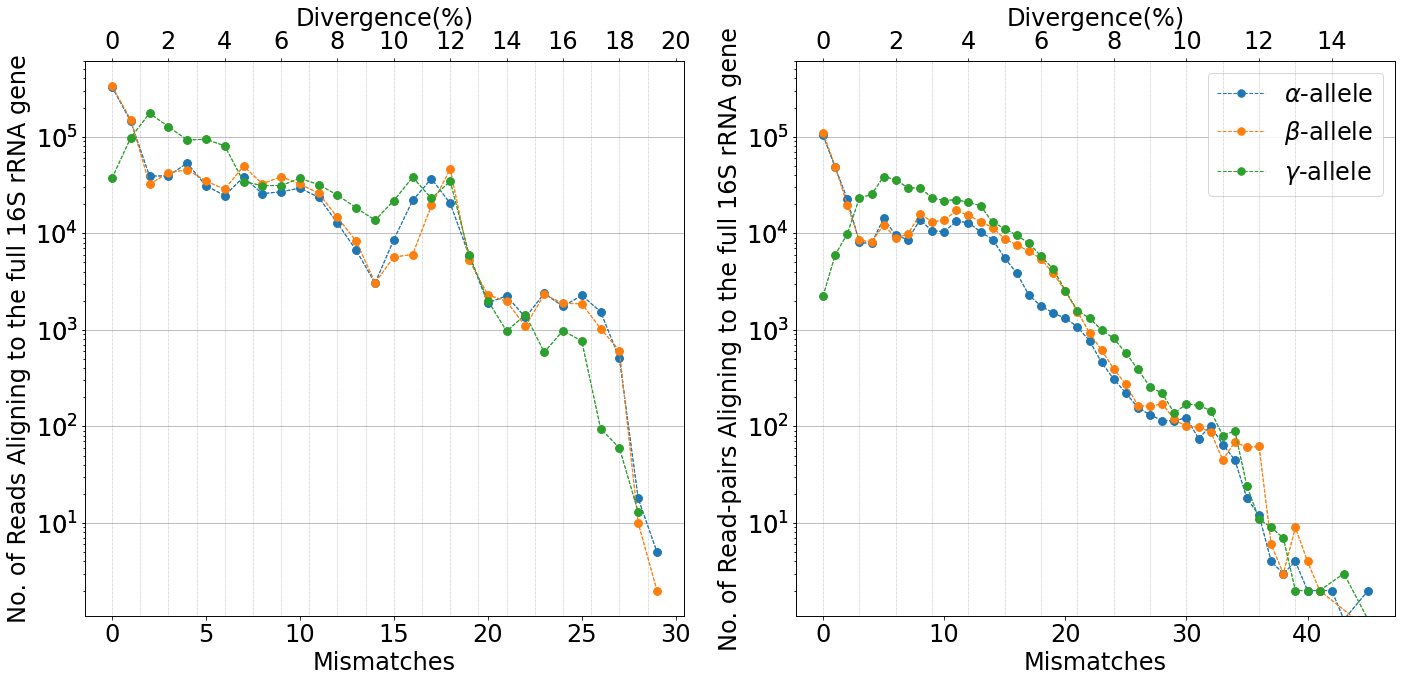

In [6]:
#df, ax, genomes, xlabel, ylabel, x_twin_label, legend, legend_list, 
#x = 'MisMatches', y = 'Num_Reads', x_twin = 'Divergence', read_length = 150, 
#colors = ['C0','C1','C2','C5']
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0] = Plot_Divergence(df_abundances_grp, ax[0], genomes, 'Mismatches', 
                        'No. of Reads Aligning to the full 16S rRNA gene', 'Divergence(%)', False, [])
ax[1] = Plot_Divergence(df_abundances_grp_pe, ax[1], genomes, 'Mismatches',
                        'No. of Read-pairs Aligning to the full 16S rRNA gene','Divergence(%)', True, legend,
                        x = 'MisMatches_Total', read_length = 300)
ax[1].set_ylim(ax[0].get_ylim())
fig.tight_layout()

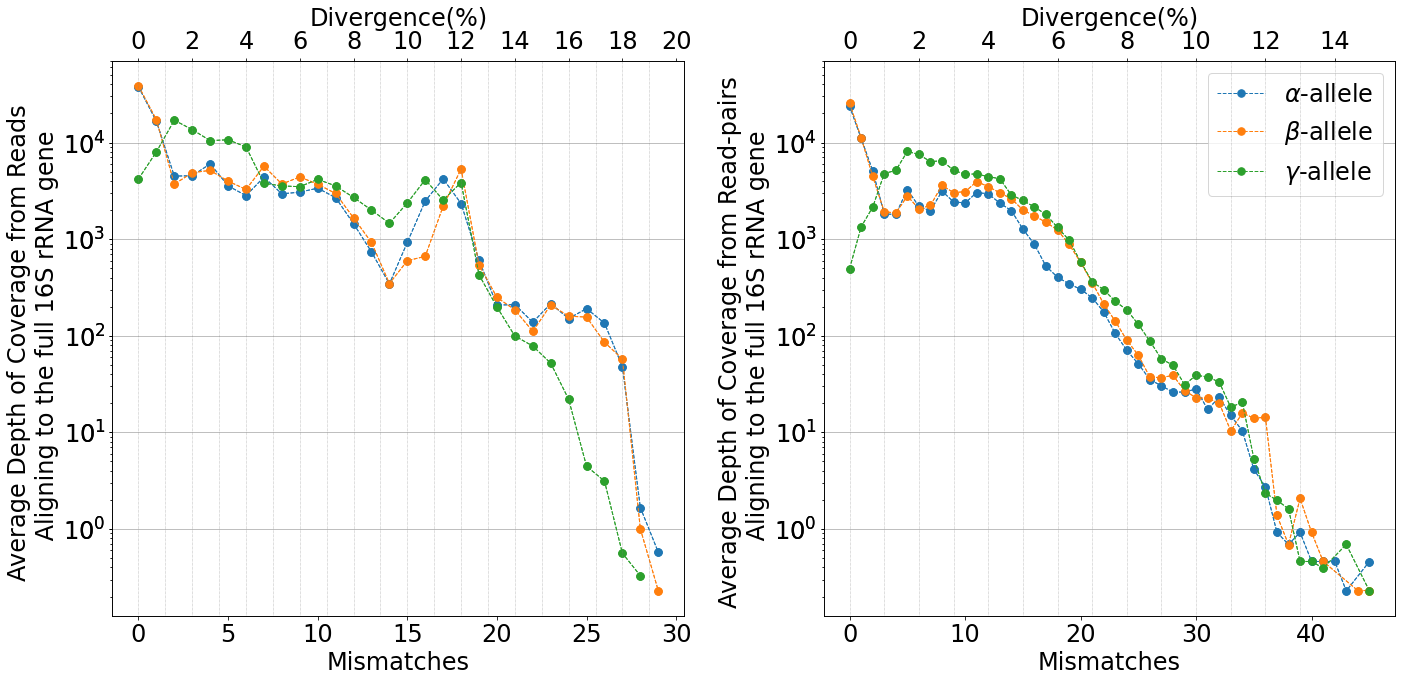

In [7]:
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0] = Plot_Divergence(df_abundances_grp, ax[0], genomes, 'Mismatches', 
                        'Average Depth of Coverage from Reads \n Aligning to the full 16S rRNA gene', 
                        'Divergence(%)', False, [], y = 'Avg_Depth_Coverage')
ax[1] = Plot_Divergence(df_abundances_grp_pe, ax[1], genomes, 'Mismatches',
                        'Average Depth of Coverage from Read-pairs \n Aligning to the full 16S rRNA gene',
                        'Divergence(%)', True, legend, x = 'MisMatches_Total', y = 'Avg_Depth_Coverage', 
                        read_length = 300)
ax[1].set_ylim(ax[0].get_ylim())
fig.tight_layout()

In [8]:
df_all_abundances_grp_sample_full = df_all_abundances.groupby(['Subject','Sample', 
                                                               'MisMatches']).apply(Coverage_Stats,
                                                                                    slen = 1300, length = 1300)
df_all_abundances_grp_sample_full = df_all_abundances_grp_sample_full.reset_index().set_index(['Subject', 
                                                                                               'Sample'])
df_all_abundances_grp_sample_full['Divergence'] = df_all_abundances_grp_sample_full['MisMatches']/150.0*100

df_all_abundances_grp_sample_full_pe = df_paired_end_read_abundances.groupby(['MisMatches_Total',
                                                                              'Subject', 
                                                                              'Sample']).apply(Coverage_Stats,
                                                                                               slen = 1300,
                                                                                               pe = True, 
                                                                                               length = 1300)
df_all_abundances_grp_sample_full_pe = df_all_abundances_grp_sample_full_pe.reset_index().set_index(['Subject', 
                                                                                                     'Sample'])
df_all_abundances_grp_sample_full_pe['Divergence'] = df_all_abundances_grp_sample_full_pe['MisMatches_Total']/300.0*100

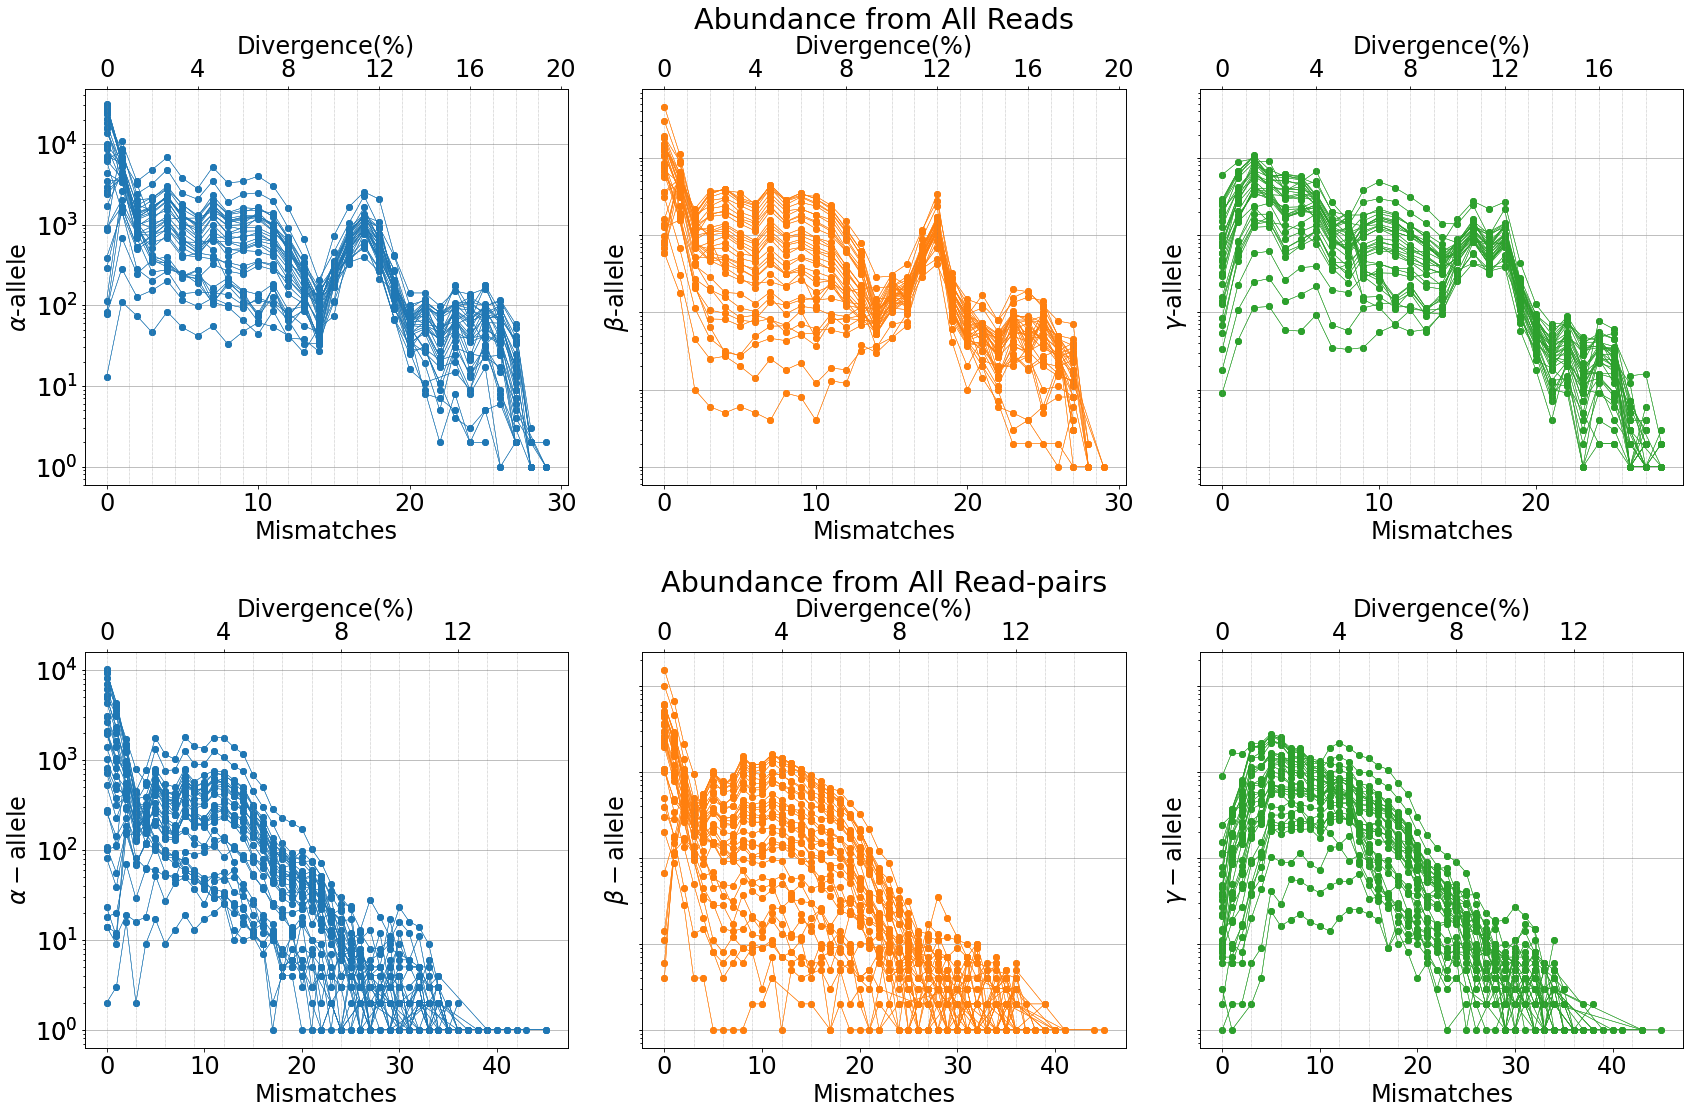

In [9]:
plt.rcParams.update(rcParams)
ylabels = [r'$\alpha-$allele',r'$\beta-$allele',r'$\gamma-$allele']
fig, ax = plt.subplots(2,3, figsize = (24, 16))
ax[0] = Plot_Divergence_Samplewise(df_all_abundances_grp_sample_full, ax[0], genomes, samples, 'Mismatches', 
                                   legend, 'Divergence(%)', False, [], read_length = 150)
ax[0][1].set_title('Abundance from All Reads')

ax[1] = Plot_Divergence_Samplewise(df_all_abundances_grp_sample_full_pe, ax[1], genomes, samples, 'Mismatches', 
                                   ylabels, 'Divergence(%)', False, [], x = 'MisMatches_Total', read_length = 300)
ax[1][1].set_title('Abundance from All Read-pairs')
fig.tight_layout()

In [10]:
df_all_abundances_filt = df_all_abundances.loc[(df_all_abundances['SStart'] >= 100) & 
                                               (df_all_abundances['SEnd'] <= 450) ]
df_abundances_grp = df_all_abundances_filt.groupby(['Subject','MisMatches']).apply(Coverage_Stats, slen = 450, 
                                                                                   pe = False, length = 350)
df_abundances_grp = df_abundances_grp.reset_index().set_index('Subject')
df_abundances_grp['Divergence'] = df_abundances_grp['MisMatches']/150.0*100

df_pe_abundances_filt = df_paired_end_read_abundances.loc[(df_paired_end_read_abundances[('SStart','1')] >= 100) &
                                                          (df_paired_end_read_abundances[('SStart','2')] >= 100) &
                                                          (df_paired_end_read_abundances[('SEnd','1')] <= 450) &
                                                          (df_paired_end_read_abundances[('SEnd','2')] <= 450)]
df_abundances_grp_pe = df_pe_abundances_filt.groupby(['MisMatches_Total','Subject']).apply(Coverage_Stats, 
                                                                                           slen = 450, pe = True,
                                                                                           length = 350)
df_abundances_grp_pe = df_abundances_grp_pe.reset_index().set_index(['Subject'])
df_abundances_grp_pe['Divergence'] = df_abundances_grp_pe['MisMatches_Total']/300.0*100

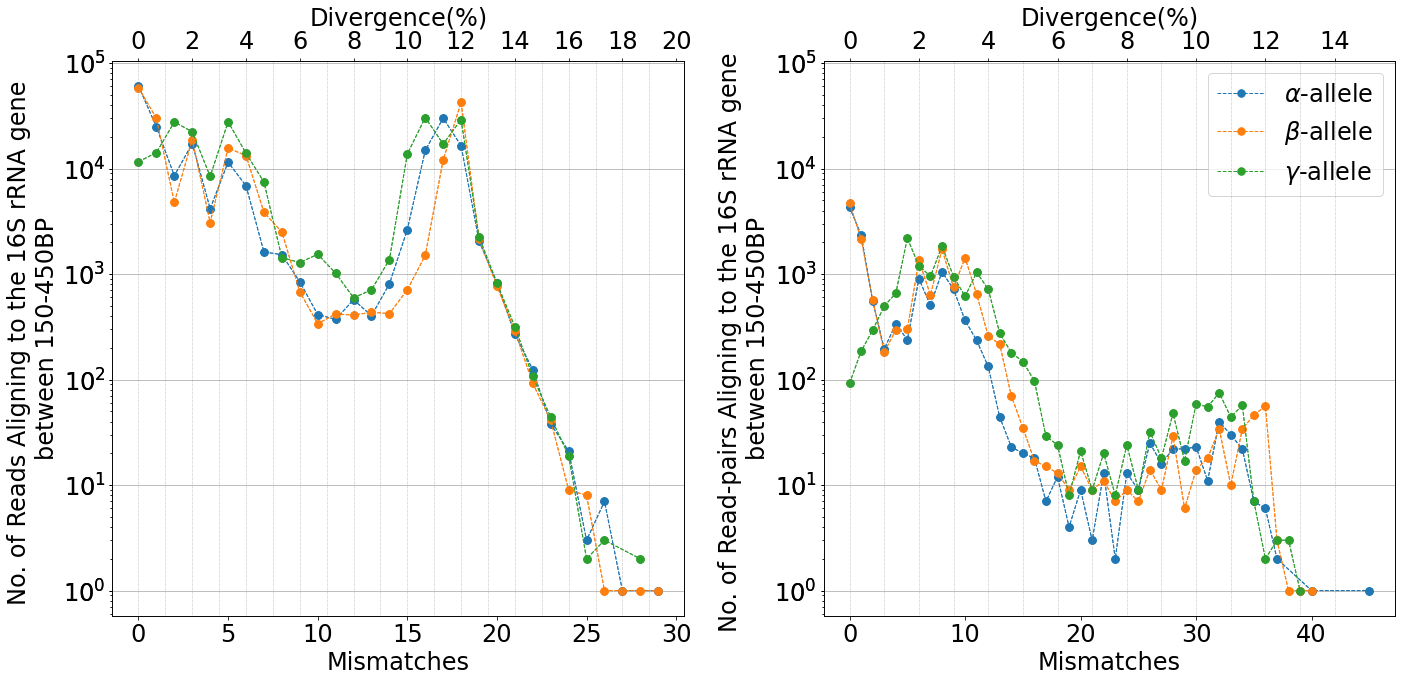

In [11]:
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0] = Plot_Divergence(df_abundances_grp, ax[0], genomes, 'Mismatches', 
                        'No. of Reads Aligning to the 16S rRNA gene \nbetween 150-450BP', 'Divergence(%)', False, [])
ax[1] = Plot_Divergence(df_abundances_grp_pe, ax[1], genomes, 'Mismatches',
                        'No. of Read-pairs Aligning to the 16S rRNA gene \nbetween 150-450BP','Divergence(%)', 
                        True, legend,x = 'MisMatches_Total', read_length = 300)
ax[1].set_ylim(ax[0].get_ylim())
fig.tight_layout()

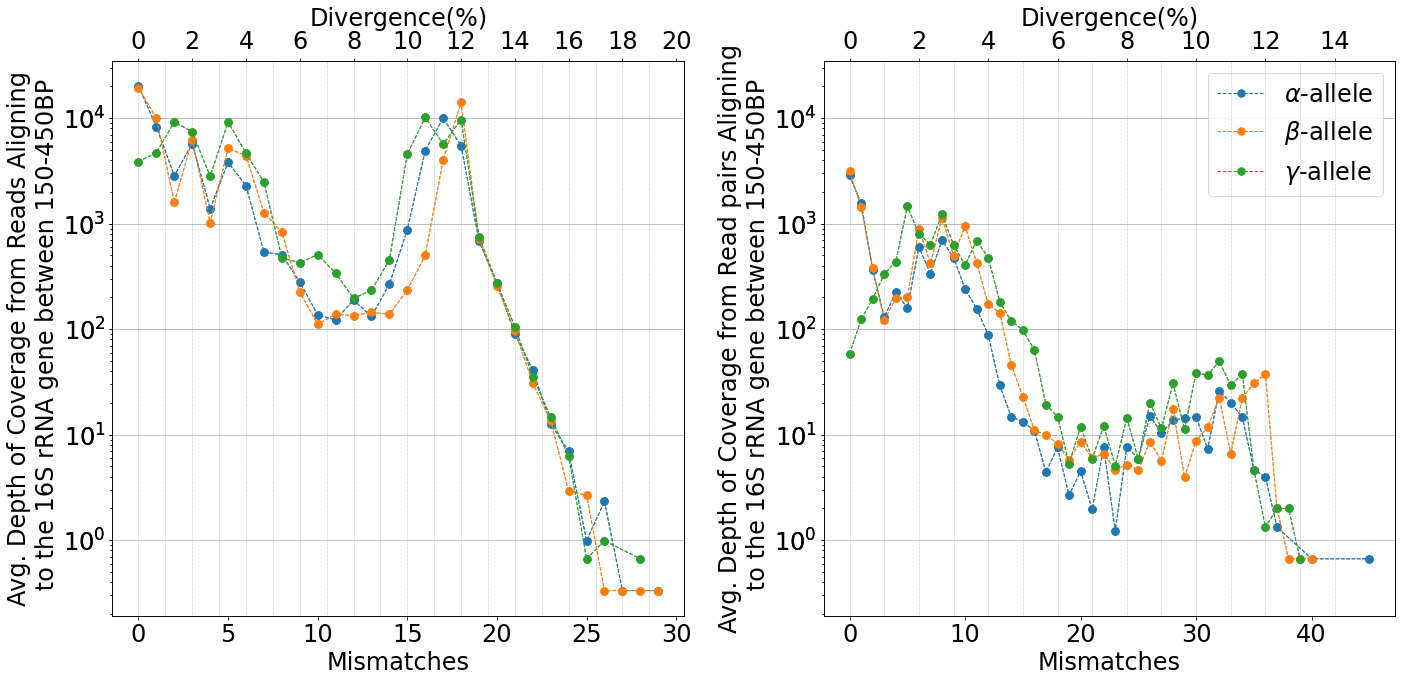

In [12]:
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0] = Plot_Divergence(df_abundances_grp, ax[0], genomes, 'Mismatches', 
                        'Avg. Depth of Coverage from Reads Aligning\n to the 16S rRNA gene between 150-450BP', 
                        'Divergence(%)', False, [], y = 'Avg_Depth_Coverage')
ax[1] = Plot_Divergence(df_abundances_grp_pe, ax[1], genomes, 'Mismatches',
                        'Avg. Depth of Coverage from Read pairs Aligning\n to the 16S rRNA gene between 150-450BP',
                        'Divergence(%)', True, legend, x = 'MisMatches_Total', y = 'Avg_Depth_Coverage', 
                        read_length = 300)
ax[1].set_ylim(ax[0].get_ylim())
fig.tight_layout()

In [13]:
df_all_abundances_filt = df_all_abundances.loc[df_all_abundances['SEnd'] < 1300]
df_all_abundances_filt = df_all_abundances_filt.set_index('Subject')
alleles = ['Synechococcus_Alpha_16SrRNA','Synechococcus_Beta_16SrRNA','Synechococcus_Gamma_16SrRNA']
op = {}
for c in alleles:
    mismatches = np.zeros(1300)
    coverage = np.zeros(1300)
    num_reads = np.zeros(1300)
    
    CS_String = df_all_abundances_filt.loc[c]['CS'].tolist()
    SStart = df_all_abundances_filt.loc[c]['SStart'].tolist()
    SEnd = df_all_abundances_filt.loc[c]['SEnd'].tolist()
    Orientation = df_all_abundances_filt.loc[c]['Orientation'].tolist()
    
    for i in range(0, len(CS_String)):
        V1 = Process_CS_String(CS_String[i], SEnd[i]-SStart[i])
        if Orientation[i] == '+': mismatches[SStart[i]:SEnd[i]] += V1
        elif Orientation[i] == '-': mismatches[SStart[i]:SEnd[i]] += V1[::-1]
        coverage[SStart[i]:SEnd[i]] += 1
        num_reads[SEnd[i]] += 1
    
    op[c] = {'Mismatches':mismatches, 'Coverage':coverage, 'Num_Reads':num_reads}
    print(c)

Synechococcus_Alpha_16SrRNA
Synechococcus_Beta_16SrRNA
Synechococcus_Gamma_16SrRNA


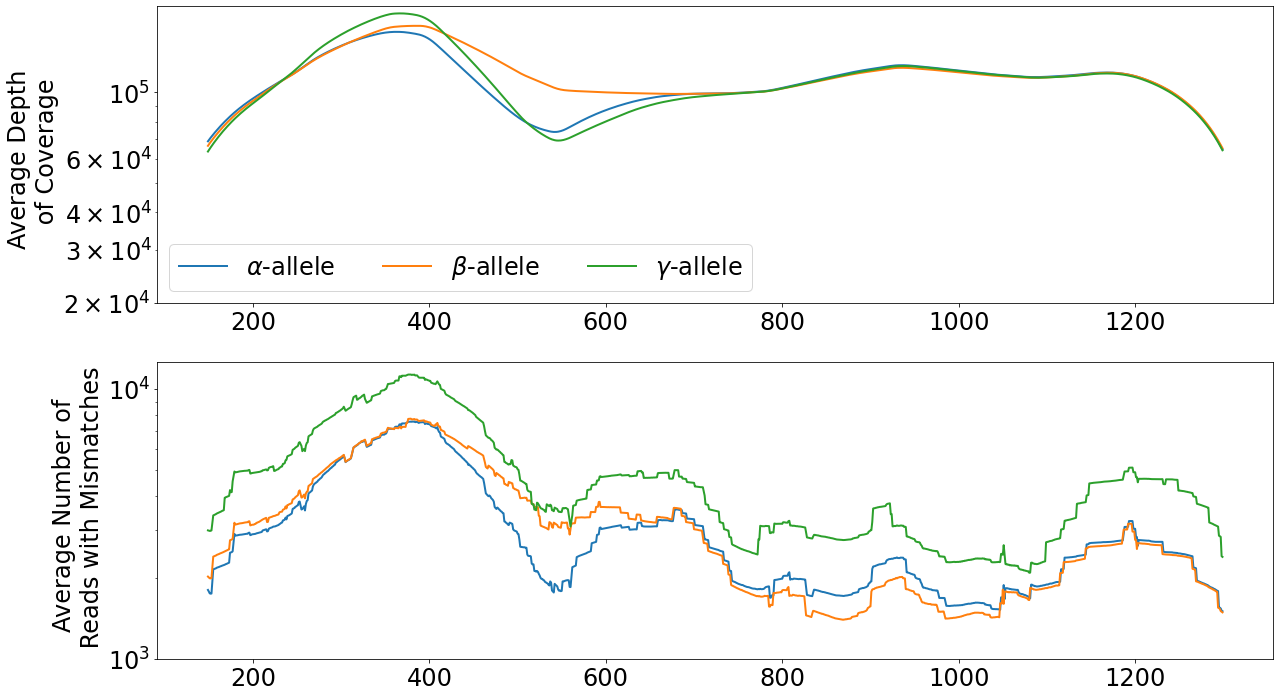

In [15]:
fig, ax = plt.subplots(2,1,figsize = (20,12))
ax[0].plot(pd.Series(op[alleles[0]]['Coverage']).rolling(window = 150).mean(), color = 'C0', 
           label = r'$\alpha$-allele', linewidth = 2)
ax[0].plot(pd.Series(op[alleles[1]]['Coverage']).rolling(window = 150).mean(), color = 'C1', 
           label = r'$\beta$-allele', linewidth = 2)
ax[0].plot(pd.Series(op[alleles[2]]['Coverage']).rolling(window = 150).mean(), color = 'C2', 
           label = r'$\gamma$-allele', linewidth = 2)

ax[1].plot(pd.Series(op[alleles[0]]['Mismatches']).rolling(window = 150).mean(), color = 'C0', linewidth = 2)
ax[1].plot(pd.Series(op[alleles[1]]['Mismatches']).rolling(window = 150).mean(), color = 'C1', linewidth = 2)
ax[1].plot(pd.Series(op[alleles[2]]['Mismatches']).rolling(window = 150).mean(), color = 'C2', linewidth = 2)

ax[0].legend(ncol = 3)
ax[0].set_ylabel('Average Depth \n of Coverage')
ax[1].set_ylabel('Average Number of \n Reads with Mismatches')

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_yticks([20000, 100000])
ax[1].set_yticks([1000, 10000])


In [16]:
samples_of_interest = ['HotsprSampleMS50','HotsprSampleMS55','HotsprSampleMS60','HotsprSampleMS65']
df_MS_all_reads = df_all_abundances[df_all_abundances['Sample'].isin(samples_of_interest)]
df_MS_PE_reads = df_paired_end_read_abundances[df_paired_end_read_abundances['Sample'].isin(samples_of_interest)]

In [17]:
df_abundances_grp = df_MS_all_reads.groupby(['Subject','MisMatches']).apply(Coverage_Stats, slen = 1300, 
                                                                            pe = False, length = 1300)
df_abundances_grp = df_abundances_grp.reset_index().set_index('Subject')
df_abundances_grp['Divergence'] = df_abundances_grp['MisMatches']/150.0*100

df_abundances_grp_pe = df_MS_PE_reads.groupby(['MisMatches_Total','Subject']).apply(Coverage_Stats, slen = 1300, 
                                                                                    pe = True, length = 1300)
df_abundances_grp_pe = df_abundances_grp_pe.reset_index().set_index(['Subject'])
df_abundances_grp_pe['Divergence'] = df_abundances_grp_pe['MisMatches_Total']/300.0*100

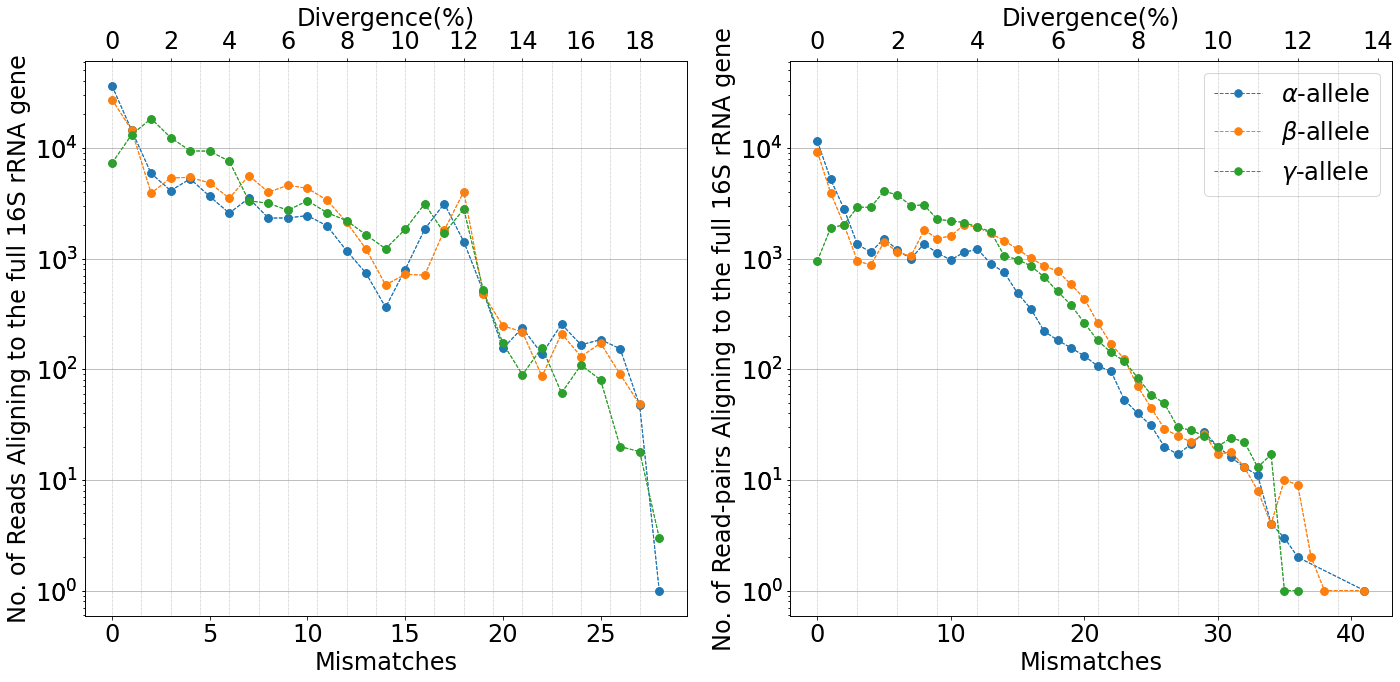

In [18]:
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0] = Plot_Divergence(df_abundances_grp, ax[0], genomes, 'Mismatches', 
                        'No. of Reads Aligning to the full 16S rRNA gene', 'Divergence(%)', False, [])
ax[1] = Plot_Divergence(df_abundances_grp_pe, ax[1], genomes, 'Mismatches',
                        'No. of Read-pairs Aligning to the full 16S rRNA gene','Divergence(%)', 
                        True, legend,x = 'MisMatches_Total', read_length = 300)
ax[1].set_ylim(ax[0].get_ylim())
fig.tight_layout()

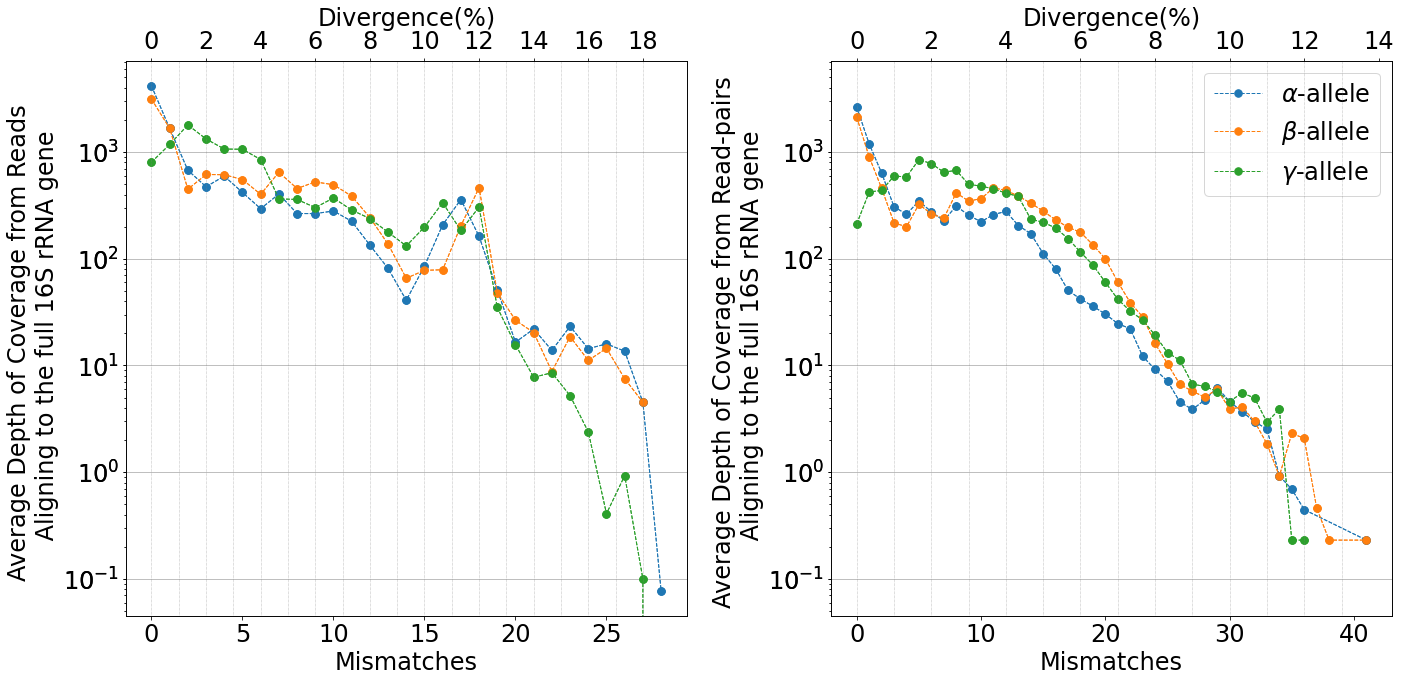

In [19]:
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0] = Plot_Divergence(df_abundances_grp, ax[0], genomes, 'Mismatches', 
                        'Average Depth of Coverage from Reads \n Aligning to the full 16S rRNA gene', 
                        'Divergence(%)', False, [], y = 'Avg_Depth_Coverage')
ax[1] = Plot_Divergence(df_abundances_grp_pe, ax[1], genomes, 'Mismatches',
                        'Average Depth of Coverage from Read-pairs \n Aligning to the full 16S rRNA gene',
                        'Divergence(%)', True, legend, x = 'MisMatches_Total', y = 'Avg_Depth_Coverage', 
                        read_length = 300)
ax[1].set_ylim(ax[0].get_ylim())
fig.tight_layout()

In [20]:
df_all_abundances_grp_sample_full = df_MS_all_reads.groupby(['Subject','Sample',
                                                             'MisMatches']).apply(Coverage_Stats,slen = 1300,
                                                                                 length = 1300)
df_all_abundances_grp_sample_full = df_all_abundances_grp_sample_full.reset_index().set_index(['Subject', 
                                                                                               'Sample'])
df_all_abundances_grp_sample_full['Divergence'] = df_all_abundances_grp_sample_full['MisMatches']/150.0*100

df_all_abundances_grp_sample_full_pe = df_MS_PE_reads.groupby(['MisMatches_Total','Subject', 
                                                               'Sample']).apply(Coverage_Stats,slen = 1300,
                                                                                pe = True, length = 1300)
df_all_abundances_grp_sample_full_pe = df_all_abundances_grp_sample_full_pe.reset_index().set_index(['Subject', 
                                                                                                     'Sample'])
df_all_abundances_grp_sample_full_pe['Divergence'] = df_all_abundances_grp_sample_full_pe['MisMatches_Total']/300.0*100

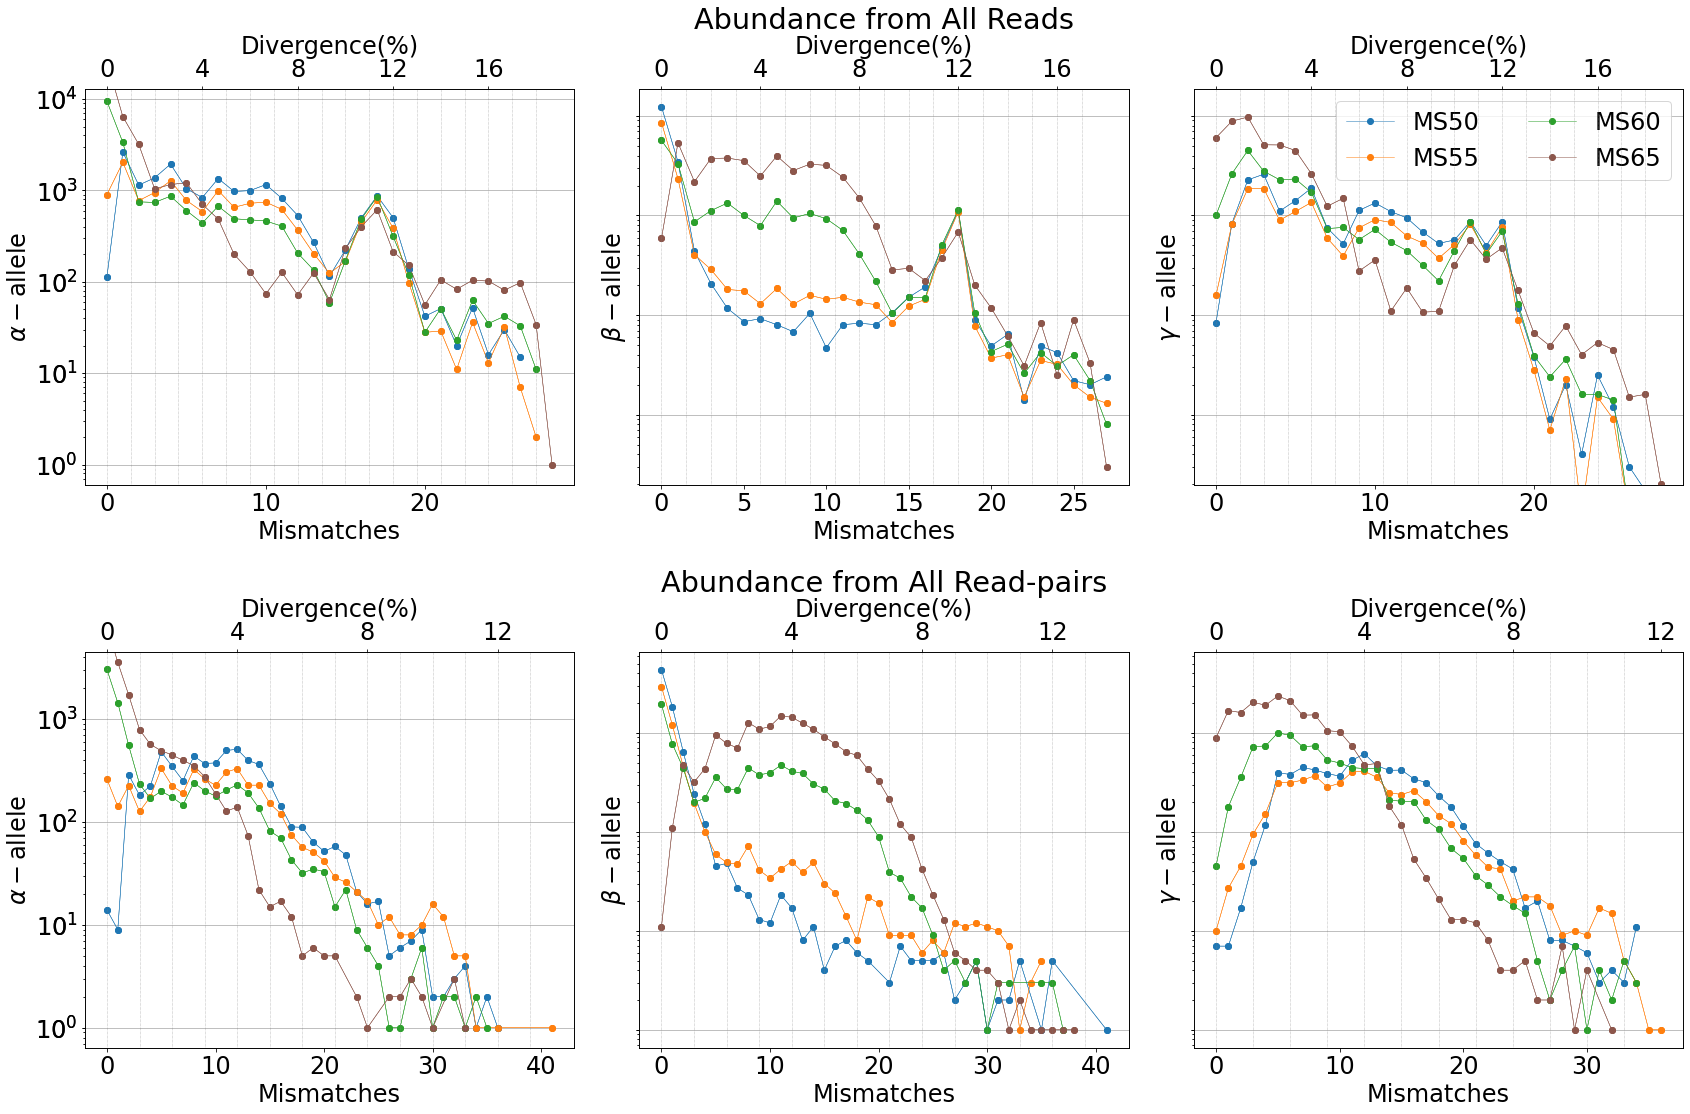

In [21]:
plt.rcParams.update(rcParams)
ylabels = [r'$\alpha-$allele',r'$\beta-$allele',r'$\gamma-$allele']
fig, ax = plt.subplots(2,3, figsize = (24, 16))
ax[0] = Plot_Divergence_Samplewise(df_all_abundances_grp_sample_full, ax[0], genomes, samples_of_interest, 
                                   'Mismatches', ylabels, 'Divergence(%)', True, ['MS50','MS55','MS60','MS65'], 
                                   read_length = 150, color_by_sample=True)
ax[0][1].set_title('Abundance from All Reads')

ax[1] = Plot_Divergence_Samplewise(df_all_abundances_grp_sample_full_pe, ax[1], genomes, samples_of_interest, 
                                   'Mismatches', ylabels, 'Divergence(%)', False, [], x = 'MisMatches_Total', 
                                   read_length = 300, color_by_sample=True)
ax[1][1].set_title('Abundance from All Read-pairs')
fig.tight_layout()

In [22]:
df_all_abundances_filt = df_MS_all_reads.loc[(df_MS_all_reads['SStart'] >= 100) & 
                                             (df_MS_all_reads['SEnd'] <= 450) ]
df_abundances_grp = df_all_abundances_filt.groupby(['Subject','MisMatches']).apply(Coverage_Stats, slen = 450, 
                                                                                   pe = False, length = 350)
df_abundances_grp = df_abundances_grp.reset_index().set_index('Subject')
df_abundances_grp['Divergence'] = df_abundances_grp['MisMatches']/150.0*100

df_pe_abundances_filt = df_MS_PE_reads.loc[(df_MS_PE_reads[('SStart','1')] >= 100) & 
                                           (df_MS_PE_reads[('SStart','2')] >= 100) &
                                           (df_MS_PE_reads[('SEnd','1')] <= 450) &
                                           (df_MS_PE_reads[('SEnd','2')] <= 450)]
df_abundances_grp_pe = df_pe_abundances_filt.groupby(['MisMatches_Total','Subject']).apply(Coverage_Stats, 
                                                                                           slen = 450, pe = True,
                                                                                          length = 350)
df_abundances_grp_pe = df_abundances_grp_pe.reset_index().set_index(['Subject'])
df_abundances_grp_pe['Divergence'] = df_abundances_grp_pe['MisMatches_Total']/300.0*100

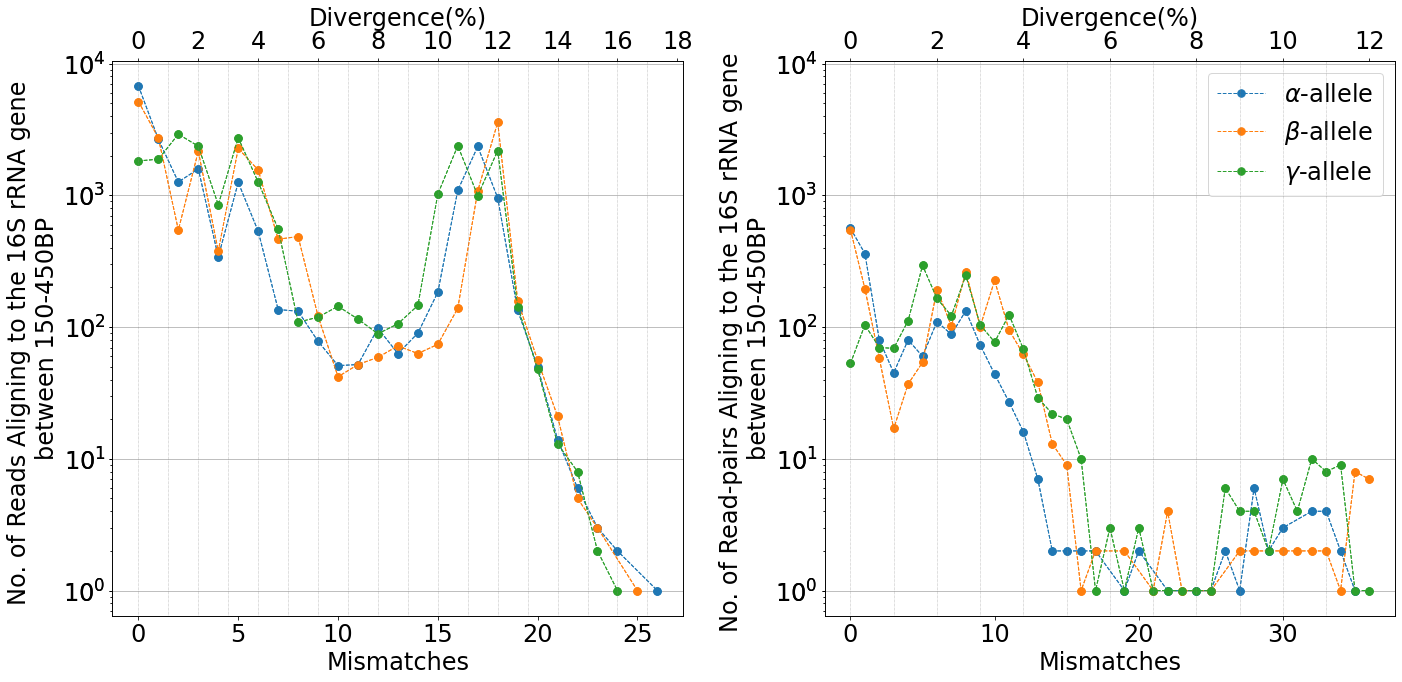

In [23]:
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0] = Plot_Divergence(df_abundances_grp, ax[0], genomes, 'Mismatches', 
                        'No. of Reads Aligning to the 16S rRNA gene \nbetween 150-450BP', 'Divergence(%)', False, [])
ax[1] = Plot_Divergence(df_abundances_grp_pe, ax[1], genomes, 'Mismatches',
                        'No. of Read-pairs Aligning to the 16S rRNA gene \nbetween 150-450BP','Divergence(%)', 
                        True, legend,x = 'MisMatches_Total', read_length = 300)
ax[1].set_ylim(ax[0].get_ylim())
fig.tight_layout()

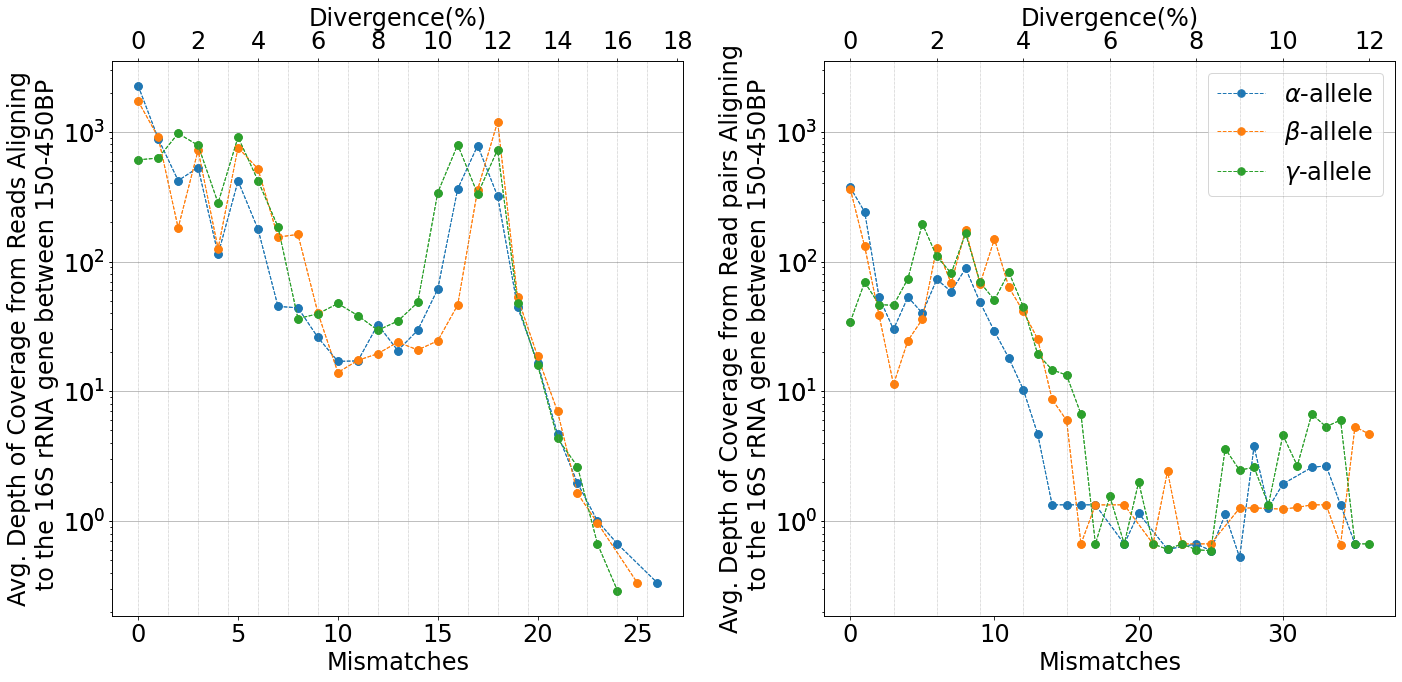

In [24]:
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0] = Plot_Divergence(df_abundances_grp, ax[0], genomes, 'Mismatches', 
                        'Avg. Depth of Coverage from Reads Aligning\n to the 16S rRNA gene between 150-450BP', 
                        'Divergence(%)', False, [], y = 'Avg_Depth_Coverage')
ax[1] = Plot_Divergence(df_abundances_grp_pe, ax[1], genomes, 'Mismatches',
                        'Avg. Depth of Coverage from Read pairs Aligning\n to the 16S rRNA gene between 150-450BP',
                        'Divergence(%)', True, legend, x = 'MisMatches_Total', y = 'Avg_Depth_Coverage', 
                        read_length = 300)
ax[1].set_ylim(ax[0].get_ylim())
fig.tight_layout()

In [25]:
df_all_abundances_grp_sample_full = df_all_abundances_filt.groupby(['Subject','Sample',
                                                             'MisMatches']).apply(Coverage_Stats,slen = 1300,
                                                                                  length = 250)
df_all_abundances_grp_sample_full = df_all_abundances_grp_sample_full.reset_index().set_index(['Subject', 
                                                                                               'Sample'])
df_all_abundances_grp_sample_full['Divergence'] = df_all_abundances_grp_sample_full['MisMatches']/150.0*100

df_all_abundances_grp_sample_full_pe = df_pe_abundances_filt.groupby(['MisMatches_Total','Subject', 
                                                               'Sample']).apply(Coverage_Stats,slen = 1300,
                                                                                pe = True, length = 350)
df_all_abundances_grp_sample_full_pe = df_all_abundances_grp_sample_full_pe.reset_index().set_index(['Subject', 
                                                                                                     'Sample'])
df_all_abundances_grp_sample_full_pe['Divergence'] = df_all_abundances_grp_sample_full_pe['MisMatches_Total']/300.0*100

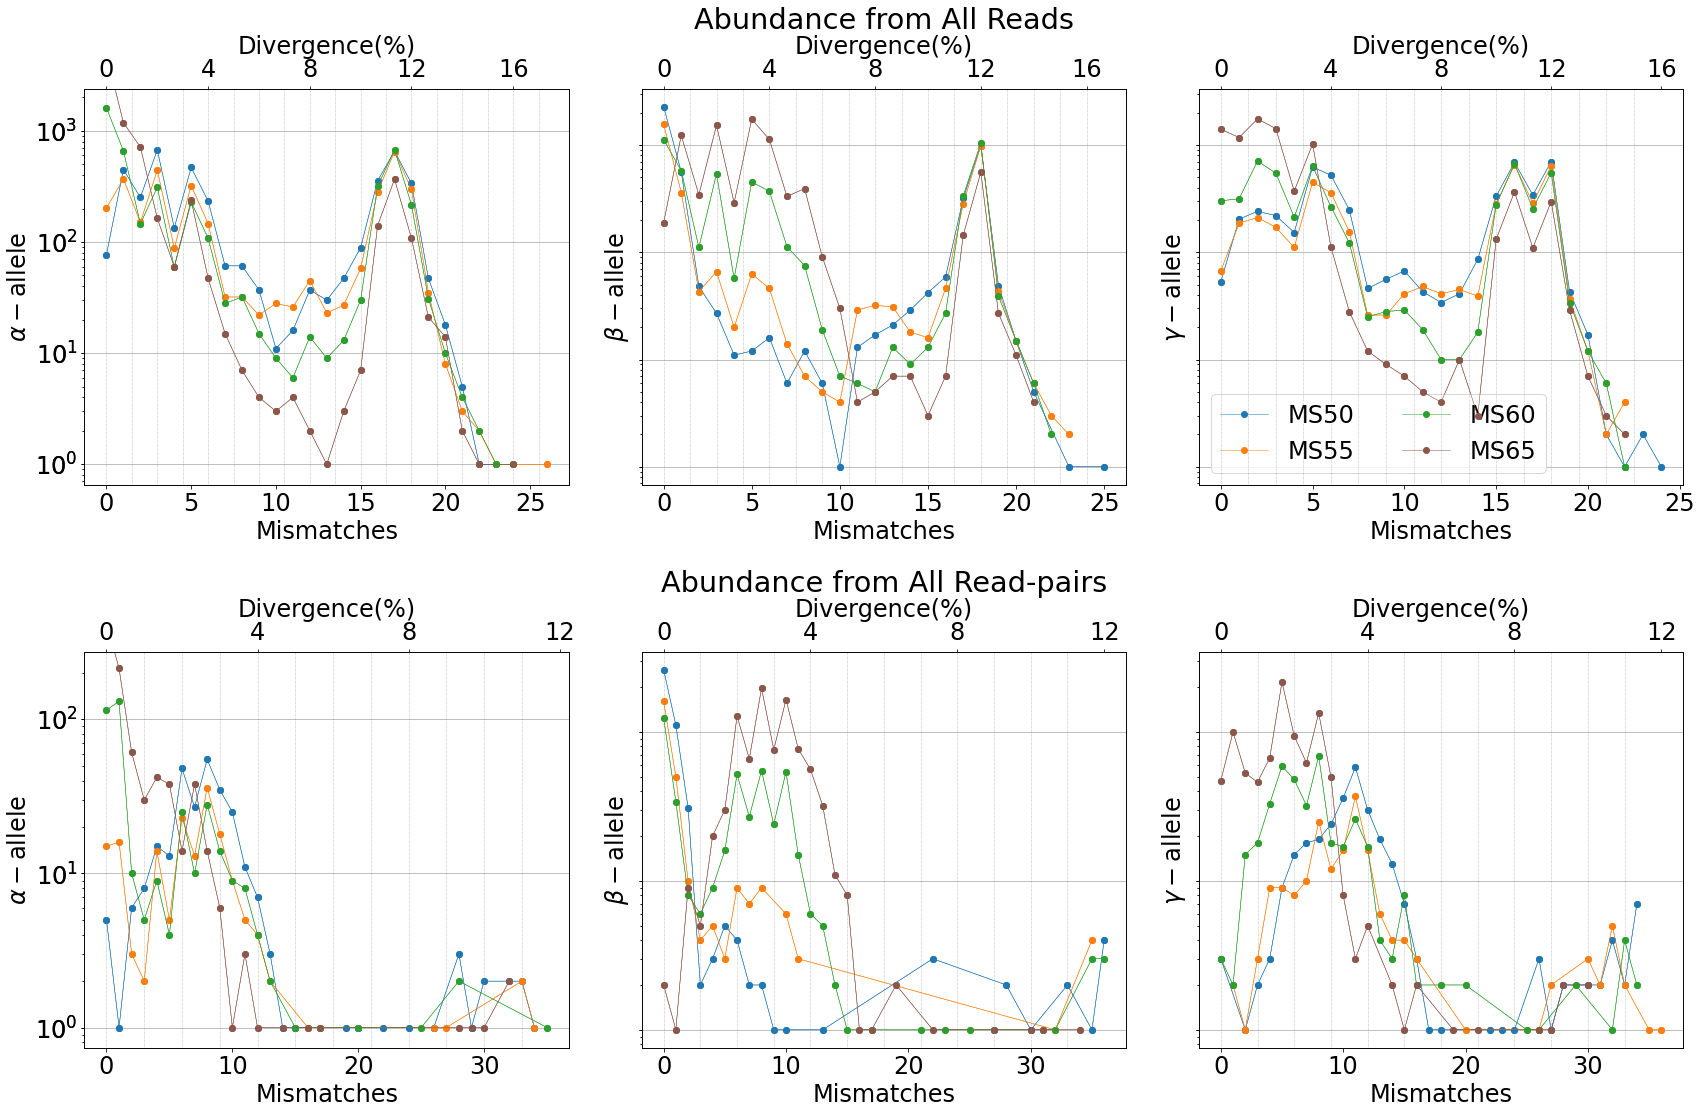

In [26]:
plt.rcParams.update(rcParams)
ylabels = [r'$\alpha-$allele',r'$\beta-$allele',r'$\gamma-$allele']
fig, ax = plt.subplots(2,3, figsize = (24, 16))
ax[0] = Plot_Divergence_Samplewise(df_all_abundances_grp_sample_full, ax[0], genomes, samples_of_interest, 
                                   'Mismatches', ylabels, 'Divergence(%)', True, ['MS50','MS55','MS60','MS65'], 
                                   read_length = 150, color_by_sample=True)
ax[0][1].set_title('Abundance from All Reads')

ax[1] = Plot_Divergence_Samplewise(df_all_abundances_grp_sample_full_pe, ax[1], genomes, samples_of_interest, 
                                   'Mismatches', ylabels, 'Divergence(%)', False, [], x = 'MisMatches_Total', 
                                   read_length = 300, color_by_sample=True)
ax[1][1].set_title('Abundance from All Read-pairs')
fig.tight_layout()

In [27]:
df_all_abundances_filt = df_MS_all_reads.loc[df_MS_all_reads['SEnd'] < 1300]
df_all_abundances_filt = df_all_abundances_filt.set_index('Subject')
alleles = ['Synechococcus_Alpha_16SrRNA','Synechococcus_Beta_16SrRNA','Synechococcus_Gamma_16SrRNA']
op = {}
for c in alleles:
    mismatches = np.zeros(1300)
    coverage = np.zeros(1300)
    num_reads = np.zeros(1300)
    
    CS_String = df_all_abundances_filt.loc[c]['CS'].tolist()
    SStart = df_all_abundances_filt.loc[c]['SStart'].tolist()
    SEnd = df_all_abundances_filt.loc[c]['SEnd'].tolist()
    Orientation = df_all_abundances_filt.loc[c]['Orientation'].tolist()
    
    for i in range(0, len(CS_String)):
        V1 = Process_CS_String(CS_String[i], SEnd[i]-SStart[i])
        if Orientation[i] == '+': mismatches[SStart[i]:SEnd[i]] += V1
        elif Orientation[i] == '-': mismatches[SStart[i]:SEnd[i]] += V1[::-1]
        coverage[SStart[i]:SEnd[i]] += 1
        num_reads[SEnd[i]] += 1
    
    op[c] = {'Mismatches':mismatches, 'Coverage':coverage, 'Num_Reads':num_reads}
    print(c)

Synechococcus_Alpha_16SrRNA
Synechococcus_Beta_16SrRNA
Synechococcus_Gamma_16SrRNA


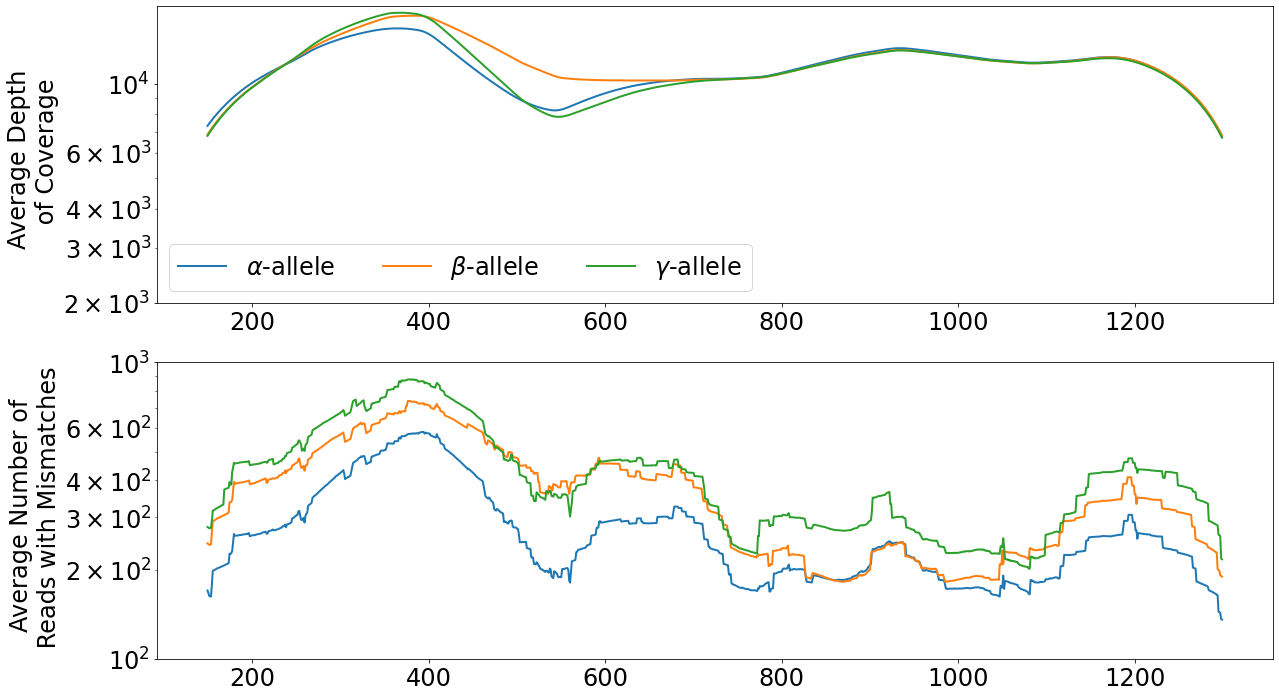

In [28]:
fig, ax = plt.subplots(2,1,figsize = (20,12))
ax[0].plot(pd.Series(op[alleles[0]]['Coverage']).rolling(window = 150).mean(), color = 'C0', 
           label = r'$\alpha$-allele', linewidth = 2)
ax[0].plot(pd.Series(op[alleles[1]]['Coverage']).rolling(window = 150).mean(), color = 'C1', 
           label = r'$\beta$-allele', linewidth = 2)
ax[0].plot(pd.Series(op[alleles[2]]['Coverage']).rolling(window = 150).mean(), color = 'C2', 
           label = r'$\gamma$-allele', linewidth = 2)

ax[1].plot(pd.Series(op[alleles[0]]['Mismatches']).rolling(window = 150).mean(), color = 'C0', linewidth = 2)
ax[1].plot(pd.Series(op[alleles[1]]['Mismatches']).rolling(window = 150).mean(), color = 'C1', linewidth = 2)
ax[1].plot(pd.Series(op[alleles[2]]['Mismatches']).rolling(window = 150).mean(), color = 'C2', linewidth = 2)

ax[0].legend(ncol = 3)
ax[0].set_ylabel('Average Depth \n of Coverage')
ax[1].set_ylabel('Average Number of \n Reads with Mismatches')

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_yticks([2000, 10000])
ax[1].set_yticks([100, 1000])

In [29]:
df_filt_400 = df_all_abundances[(df_all_abundances['SStart'] >= 200)&(df_all_abundances['SEnd'] <= 400)]
df_filt_1200 = df_all_abundances[(df_all_abundances['SStart'] >= 1000)&(df_all_abundances['SEnd'] <= 1200)]

df_filt_400_grp = df_filt_400.groupby(['Subject','MisMatches']).apply(Coverage_Stats,slen = 1300, length = 200)
df_filt_400_grp = df_filt_400_grp.reset_index().set_index(['Subject'])
df_filt_400_grp['Divergence'] = df_filt_400_grp['MisMatches']/150.0*100

df_filt_1200_grp = df_filt_1200.groupby(['Subject','MisMatches']).apply(Coverage_Stats,slen = 1300, length = 200)
df_filt_1200_grp = df_filt_1200_grp.reset_index().set_index(['Subject'])
df_filt_1200_grp['Divergence'] = df_filt_1200_grp['MisMatches']/150.0*100


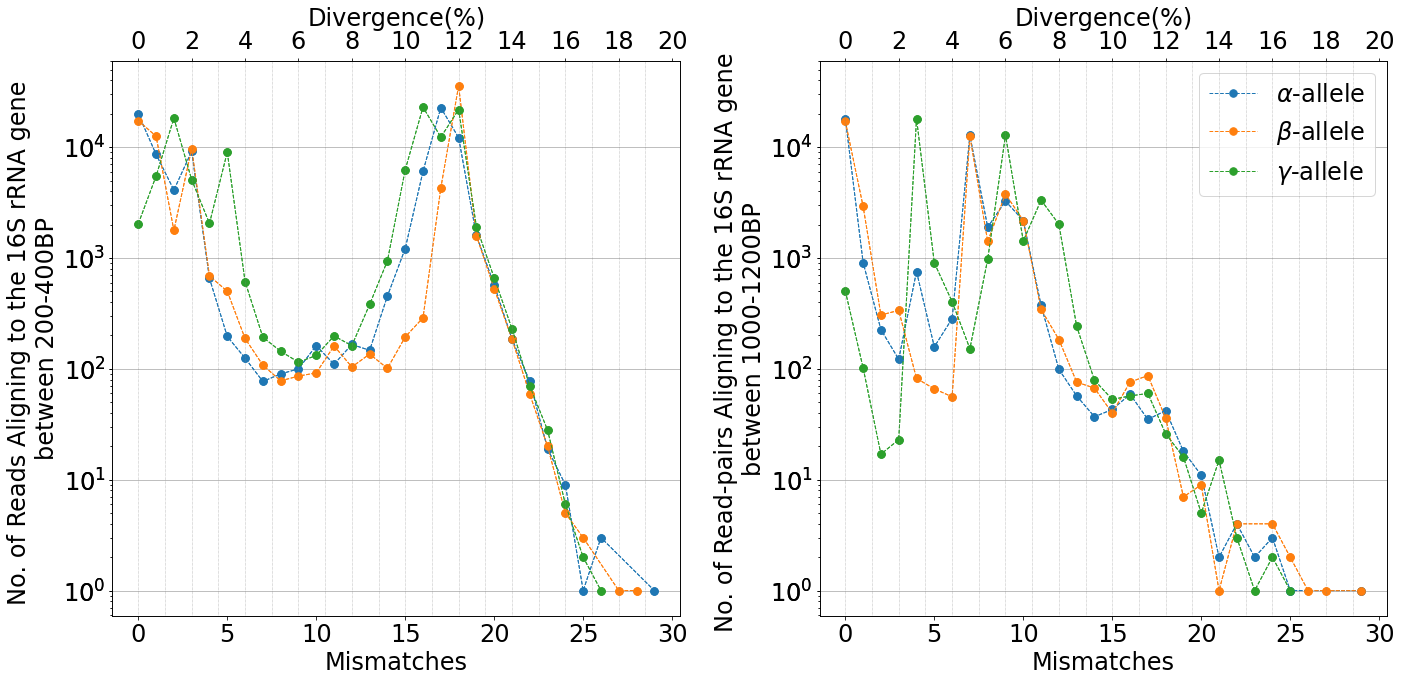

In [30]:
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0] = Plot_Divergence(df_filt_400_grp, ax[0], genomes, 'Mismatches', 
                        'No. of Reads Aligning to the 16S rRNA gene \nbetween 200-400BP', 'Divergence(%)', False, [])
ax[1] = Plot_Divergence(df_filt_1200_grp, ax[1], genomes, 'Mismatches',
                        'No. of Read-pairs Aligning to the 16S rRNA gene \nbetween 1000-1200BP','Divergence(%)', 
                        True, legend_list=legend, read_length = 150)
ax[1].set_ylim(ax[0].get_ylim())
fig.tight_layout()

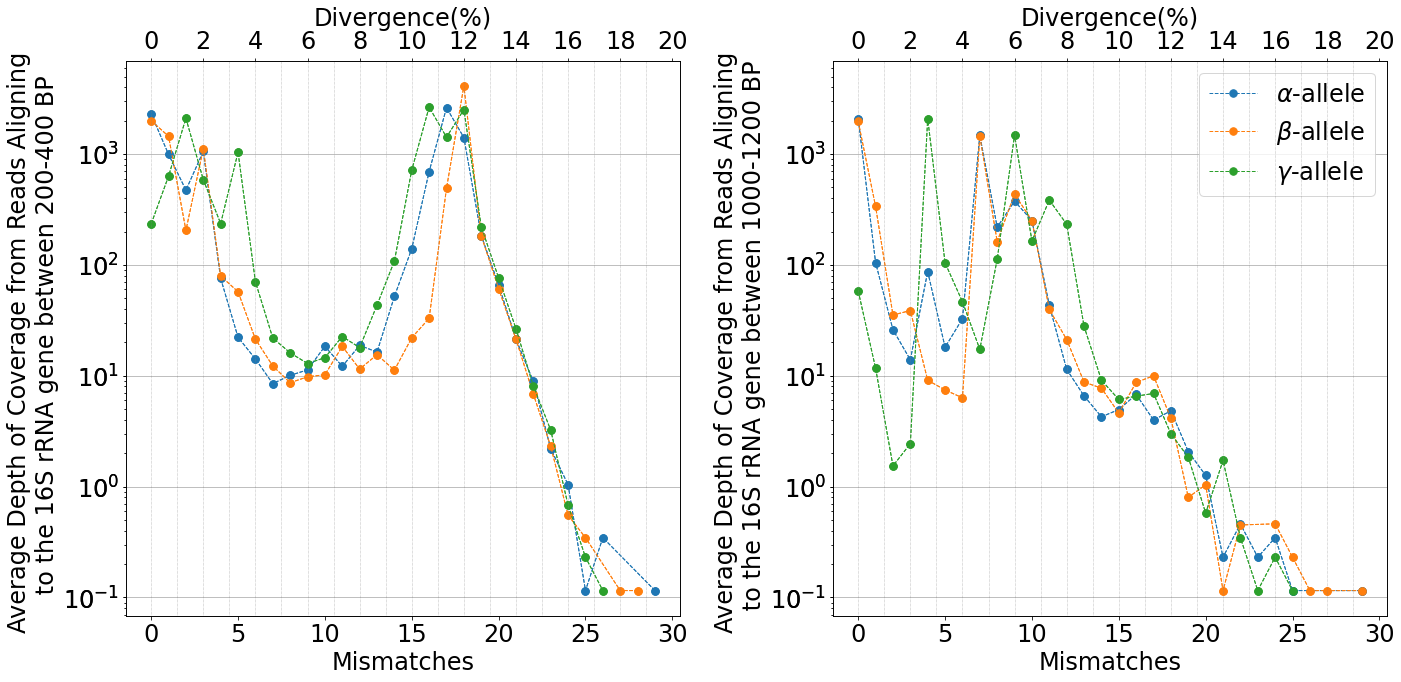

In [31]:
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0] = Plot_Divergence(df_filt_400_grp, ax[0], genomes, 'Mismatches', 
                        'Average Depth of Coverage from Reads Aligning \n to the 16S rRNA gene between 200-400 BP',
                        'Divergence(%)', False, [], y = 'Avg_Depth_Coverage', read_length = 150)
ax[1] = Plot_Divergence(df_filt_1200_grp, ax[1], genomes, 'Mismatches',
                        'Average Depth of Coverage from Reads Aligning \n to the 16S rRNA gene between 1000-1200 BP', 
                        'Divergence(%)', True, legend_list=legend, y = 'Avg_Depth_Coverage', read_length = 150)
ax[1].set_ylim(ax[0].get_ylim())
fig.tight_layout()

In [32]:
df_filt_400 = df_MS_all_reads[(df_MS_all_reads['SStart'] >= 200)&(df_MS_all_reads['SEnd'] <= 400)]
df_filt_1200 = df_MS_all_reads[(df_MS_all_reads['SStart'] >= 1000)&(df_MS_all_reads['SEnd'] <= 1200)]

df_filt_400_grp = df_filt_400.groupby(['Subject','Sample','MisMatches']).apply(Coverage_Stats,slen = 1300, length = 200)
df_filt_400_grp = df_filt_400_grp.reset_index().set_index(['Subject','Sample'])
df_filt_400_grp['Divergence'] = df_filt_400_grp['MisMatches']/150.0*100

df_filt_1200_grp = df_filt_1200.groupby(['Subject','Sample','MisMatches']).apply(Coverage_Stats,slen = 1300, length = 200)
df_filt_1200_grp = df_filt_1200_grp.reset_index().set_index(['Subject','Sample'])
df_filt_1200_grp['Divergence'] = df_filt_1200_grp['MisMatches']/150.0*100


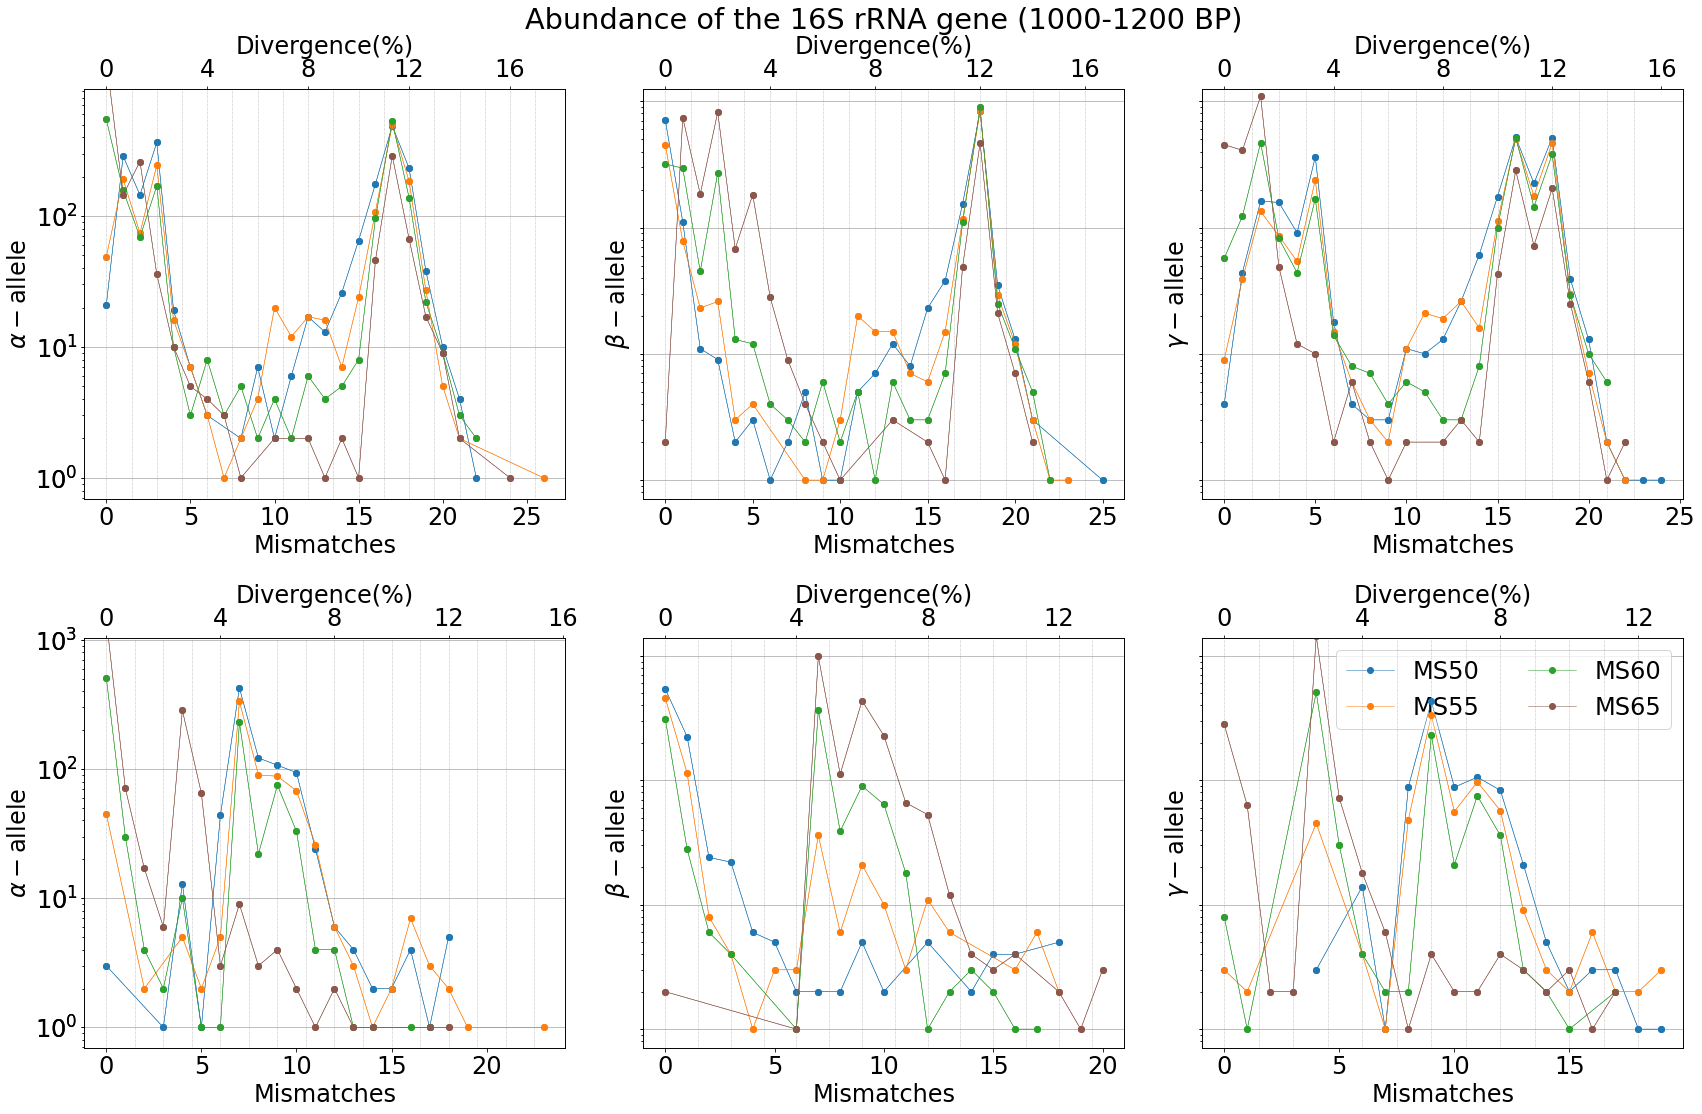

In [33]:
plt.rcParams.update(rcParams)
ylabels = [r'$\alpha-$allele',r'$\beta-$allele',r'$\gamma-$allele']
fig, ax = plt.subplots(2,3, figsize = (24, 16))
ax[0] = Plot_Divergence_Samplewise(df_filt_400_grp, ax[0], genomes, samples_of_interest, 
                                   'Mismatches', ylabels, 'Divergence(%)', False, ['MS50','MS55','MS60','MS65'], 
                                   read_length = 150, color_by_sample=True)
ax[0][1].set_title('Abundance of the 16S rRNA gene (200-400 BP)')

ax[1] = Plot_Divergence_Samplewise(df_filt_1200_grp, ax[1], genomes, samples_of_interest, 
                                   'Mismatches', ylabels, 'Divergence(%)', True, ['MS50','MS55','MS60','MS65'], 
                                   read_length = 150, color_by_sample=True)
ax[0][1].set_title('Abundance of the 16S rRNA gene (1000-1200 BP)')
fig.tight_layout()

In [45]:
fdir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/16S_Gene_Segments/'
out = {}
for f in ['Synechococcus_Alpha_16SrRNA','Synechococcus_Beta_16SrRNA','Synechococcus_Gamma_16SrRNA']:
    lines = open(fdir+f+'.fna').readlines()
    s = ''
    for l in lines:
        if not l.startswith('>'):
            s += l.replace("\n","")
    out[f.replace("Synechococcus_","").replace("_16SrRNA","")] = s
outpath = '/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Single_Cell_Analyses/'

In [50]:
ms_samples = ['HotsprSampleMS50','HotsprSampleMS55','HotsprSampleMS60','HotsprSampleMS65']
df_ms = df_all_abundances[(df_all_abundances['SStart'] >= 350) & (df_all_abundances['SEnd'] <= 550)]
df_ms_grp_samples = df_ms.groupby(['Subject','Sample','MisMatches']).apply(Coverage_Stats,slen = 1300,
                                                                           length = 200).reset_index()
df_ms_grp_samples = df_ms_grp_samples[df_ms_grp_samples['Sample'].isin(ms_samples)]
df_ms_grp_samples = df_ms_grp_samples[df_ms_grp_samples['Subject'] == 'Synechococcus_Gamma_16SrRNA']
df_ms_grp_samples = df_ms_grp_samples.set_index('Sample')
df_ms_grp_samples['Divergence'] = df_ms_grp_samples['MisMatches']/150*100.0

In [51]:
from Utils_MSA import *

alpha_list, beta_list = [], []
window = 150
for i in range(350, 550-window):
    start, end = i, i+150
    alpha = out['Alpha'][start:end]
    beta = out['Beta'][start:end]
    gamma = out['Gamma'][start:end]
    e, alpha_align = Edit(alpha, gamma)
    alpha_list.append(e)
    e, beta_align = Edit(beta, gamma)
    beta_list.append(e)
    

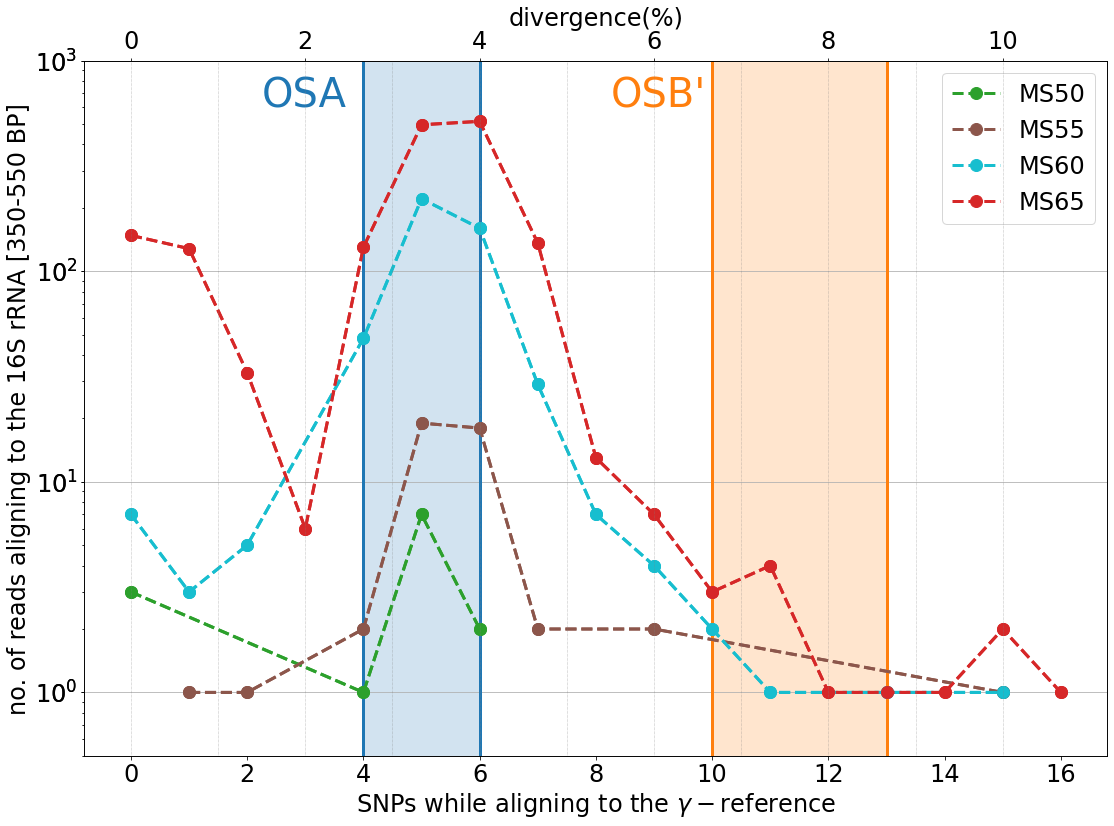

In [52]:
fig,ax = plt.subplots(1,1, figsize = (16,12), sharex = True, sharey = True)
colors = ['C2','C5','C9','C13']

ax = Plot_Divergence(df_ms_grp_samples, ax, ms_samples, 'SNPs while aligning to the '+r'$\gamma-$reference' , 
                     'no. of reads aligning to the 16S rRNA [350-550 BP]', 
                     'divergence(%)', True, ['MS50', 'MS55', 'MS60', 'MS65'], 
                      y = 'Num_Reads', read_length = 150, colors = colors, lw = 3, ms = 12)

ax.axvline(min(alpha_list), color = 'C0', linewidth = 3)
ax.axvline(max(alpha_list), color = 'C0', linewidth = 3)
ax.axvspan(min(alpha_list), max(alpha_list), color = 'C0', alpha = 0.2)

ax.axvline(min(beta_list), color = 'C1', linewidth = 3)
ax.axvline(max(beta_list), color = 'C1', linewidth = 3)
ax.axvspan(min(beta_list), max(beta_list), color = 'C1', alpha = 0.2)

ax.text(x = min(alpha_list)-1.75, y = 600, s = 'OSA', c = 'C0', size = 40)
ax.text(x = min(beta_list)-1.75, y = 600, s = 'OSB\'', c = 'C1', size = 40)

ax.set_ylim([0.5,1000])
fig.tight_layout()

fig.savefig(outpath+'Abundance-Gamma-Allele-350-550.pdf')